In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import applications

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import glob
import os
print("Cats&Dogs Dataset Folder Contain:",os.listdir("./"))

Cats&Dogs Dataset Folder Contain: ['test1.zip', 'train_x', 'sampleSubmission.csv', 'train', 'test1', 'dog_vscat.ipynb', 'cats_and_dogs_small', 'dogs-vs-cats.zip', 'train_y', 'kaggle_kernel.ipynb', 'train.zip', 'fine_tuning.keras']


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

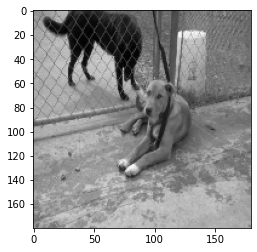

In [3]:
main_dir = "/home/azureuser/cats_vsdogs/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)
for p in os.listdir(path):
    category = p.split(".")[1]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(180, 180))
    plt.imshow(new_img_array,cmap="gray")
    break

In [26]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(180, 180))
        X.append(new_img_array)
        y.append(category)

In [27]:
create_test_data(path)
X = np.array(X).reshape(-1,180,180,1)
y = np.array(y)

In [28]:
X.shape

(25000, 180, 180, 1)

In [29]:
import pickle
pickle.dump(X,open("train_x","wb"))
pickle.dump(y,open("train_y","wb"))

In [30]:
X = X/255.0

In [31]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 102s 85ms/step - loss: 0.6735 - accuracy: 0.5875 - val_loss: 0.6095 - val_accuracy: 0.6744
Epoch 2/10
625/625 [==============================] - 52s 84ms/step - loss: 0.5307 - accuracy: 0.7323 - val_loss: 0.4998 - val_accuracy: 0.7542
Epoch 3/10
625/625 [==============================] - 52s 84ms/step - loss: 0.4312 - accuracy: 0.7994 - val_loss: 0.5687 - val_accuracy: 0.7324
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3552 - accuracy: 0.8402 - val_loss: 0.5502 - val_accuracy: 0.7570
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2694 - accuracy: 0.8852 - val_loss: 0.5398 - val_accuracy: 0.7768
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1734 - accuracy: 0.9311 - val_loss: 0.6786 - val_accuracy: 0.7770
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1041 - accuracy: 0.9615 - val_loss: 0.8003 - val_accuracy

In [33]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(180, 180))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,180,180,1)
X_test = X_test/255

In [34]:
predictions = model.predict(X_test)

In [35]:
predicted_val = [int(round(p[0])) for p in predictions]

In [36]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [ ]:
submission_df.to_csv("submission.csv", index=False)